# Customer_Churn_prediction

**Author Name:** Umar Shahzad

  

**This data is collected from following link**
[Data](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?select=Customer-Churn-Records.csv)


# About Dataset
1.  RowNumber—corresponds to the record (row) number and has no effect on the output.
2.  CustomerId—contains random values and has no effect on customer leaving the bank.
3.  Surname—the surname of a customer has no impact on their decision to leave the bank.
4.  CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5.  Geography—a customer’s location can affect their decision to leave the bank.
6.  Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
7.  Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8.  Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9.  Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10.  NumOfProducts—refers to the number of products that a customer has purchased through the bank.
11.  HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12.  IsActiveMember—active customers are less likely to leave the bank.
13.  EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14.  Exited—whether or not the customer left the bank.
Complain—customer has complaint or not.
Satisfaction Score—Score provided by the customer for their complaint resolution.
15. Card Type—type of card hold by the customer.
Points Earned—the points earned by the customer for using credit card.

Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

**Purpose of customer churn prediction**

The purpose of customer churn prediction is to identify customers who are likely to leave a Bank or discontinue their relationship with a Bank. Customer churn, also known as customer attrition, can have significant negative impacts on a Bank. Losing customers not only results in the loss of revenue but also increases the cost of acquiring new customers to replace them.

#conect to google drive

In [1]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import labrary

In [3]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report



#Step1. Reading and Understanding the data

In [4]:
#Lets load data
df = pd.read_csv('/content/drive/MyDrive/dataset/Customer-Churn-Records.csv')

In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


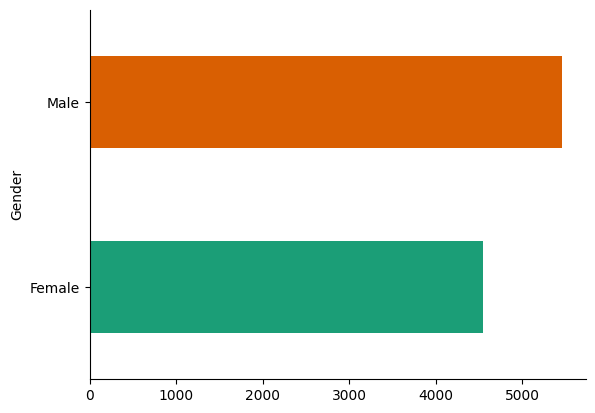

In [6]:
#  Gender vs female
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
pd.set_option('display.max_columns',None	)
pd.set_option('display.max_rows', None)

In [8]:
print(f"the number of rows: = ({df.shape[0]})\nThe number of columns: = ({df.shape[1]})")

the number of rows: = (10000)
The number of columns: = (18)


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [10]:
df.drop(columns =['RowNumber', 'Surname', 'CustomerId'], axis=1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

Numeric feature

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Catagorical feature:

In [13]:
df.describe(include='O')

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


# Step 2 : Cleaning the data

After Removing the columns not useful for dataset

In [14]:
#sepration of categorical and numerical colimns
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:")
print(cat_columns)

print("Numerical Columns:")
print(num_columns)

Categorical Columns:
Index(['Geography', 'Gender', 'Card Type'], dtype='object')
Numerical Columns:
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned'],
      dtype='object')


In [15]:
df['Exited'].mean()

0.2038

In [16]:
df[df['Exited']==1]['Tenure'].mean()

4.934739941118744

In [17]:
df.apply(np.max)

CreditScore                 850
Geography                 Spain
Gender                     Male
Age                          92
Tenure                       10
Balance               250898.09
NumOfProducts                 4
HasCrCard                     1
IsActiveMember                1
EstimatedSalary       199992.48
Exited                        1
Complain                      1
Satisfaction Score            5
Card Type                SILVER
Point Earned               1000
dtype: object

In [18]:
# Percentage of customer stayed in the bank
total_customers = len(df)
churned_count = df[df['Exited'] == 1]['Exited'].count()
not_churned_count = df[df['Exited'] == 0]['Exited'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100

print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Percentage of customers who churned: 20.38%
Percentage of customers who did not churn: 79.62%


In [19]:
value_counts = df['Exited'].value_counts()
print(value_counts)

Exited
0    7962
1    2038
Name: count, dtype: int64


In [20]:
value_counts = df['Exited'].value_counts(normalize=True)
print(value_counts)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64


Text(0, 0.5, 'Count')

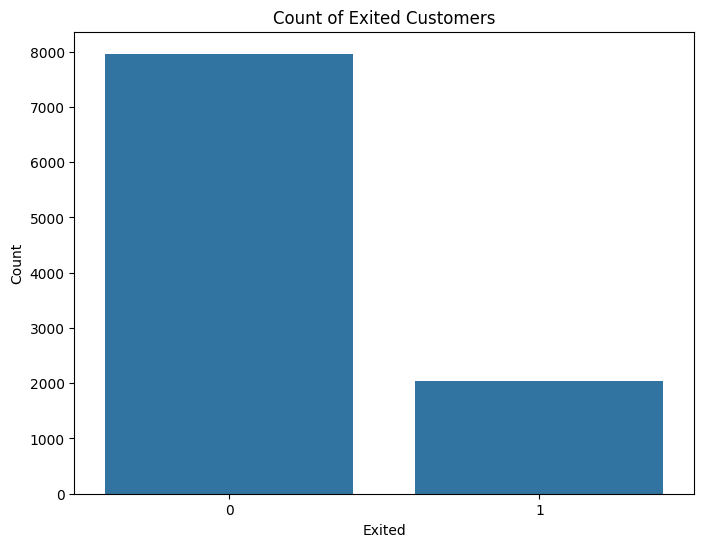

In [21]:
#check cancelation status
#0---> not Exited
#1---> Exited


# Plotting a bar plot for the 'Exited' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Exited')
plt.title('Count of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')


**BanCount of Exited Customers**

1.   79% customers are are want to leave bank
2.   21% customers are are not want to leave the bank



check male and female exited

In [22]:
#for male percentage
male = df[df['Gender']=='Male']
male['Exited'].value_counts(normalize = True)

Exited
0    0.835257
1    0.164743
Name: proportion, dtype: float64

**For Female**
1.   83% are want to leave the bank
2.   17% female are not want to leave the bank



In [23]:
# for female percentage
female = df[df['Gender'] == 'Female']
female_exited_percentage = female['Exited'].value_counts(normalize=True)
print(female_exited_percentage)

Exited
0    0.749285
1    0.250715
Name: proportion, dtype: float64


**For Male**
1.   74% Male are want to leave the bank
2.   26% Male are not want to leave the bank

Text(0, 0.5, 'count')

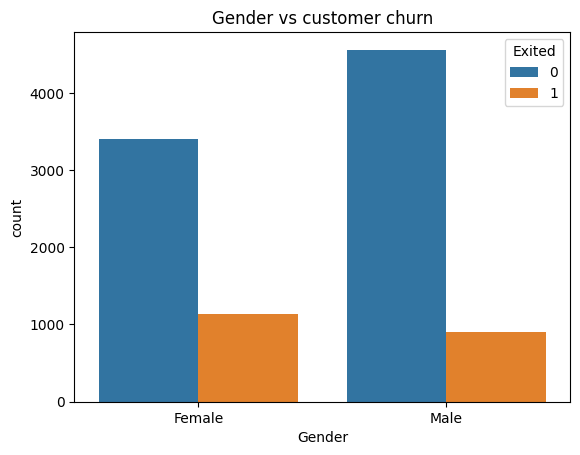

In [24]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Gender vs customer churn')
plt.xlabel('Gender')
plt.ylabel('count')

**For Female**
1.   83% female are want to leave the bank
2.   17% female are not want to leave the bank

**For Male**
1.   74% Male are want to leave the bank
2.   26% Male are not want to leave the bank

## Checking missing values:

In [25]:
missing_val = df.isnull().sum()
per = df.isnull().sum() / df.isnull().count()
missing_data = pd.concat([missing_val, per], axis=1, keys=['Total', 'Percent'])

In [26]:
missing_data

,Total,Percent
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,0,0.0
IsActiveMember,0,0.0
EstimatedSalary,0,0.0


check missing value using heatmap

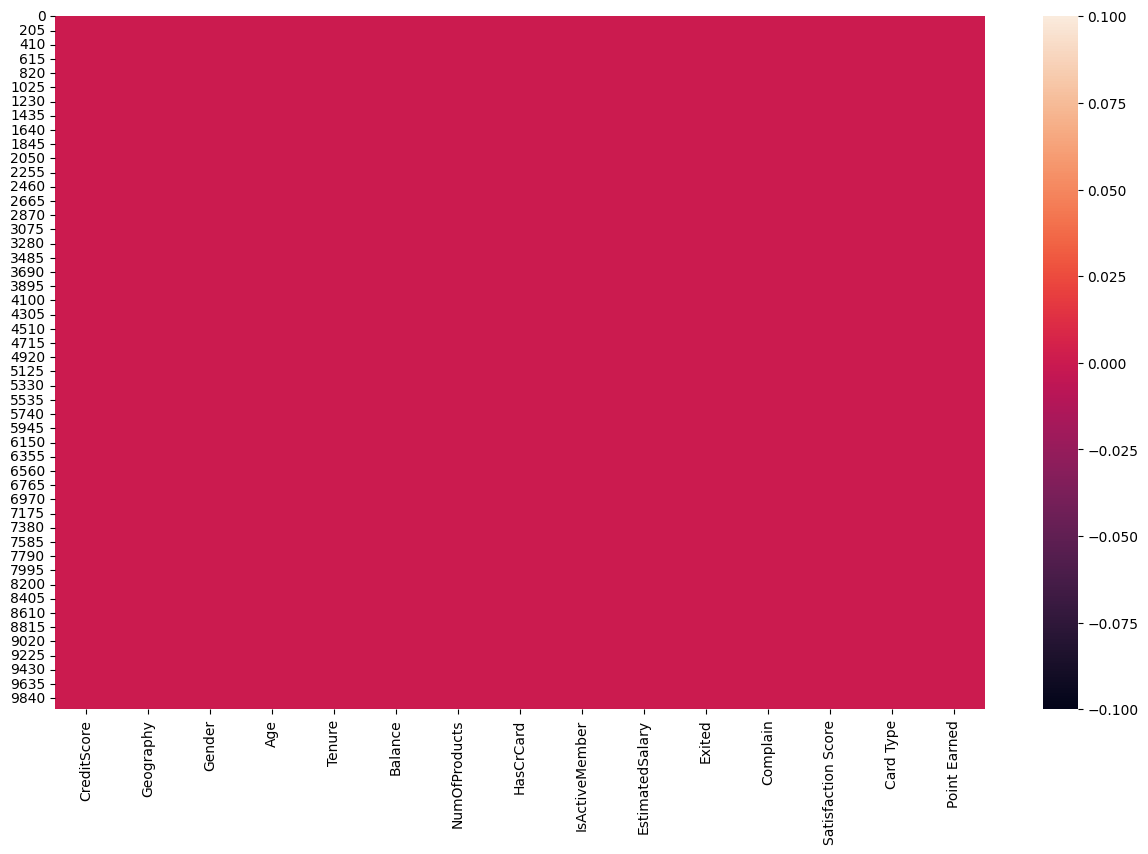

In [27]:
plt.figure(figsize=(15,9))
sns.heatmap(df.isnull())
plt.show()

* According to this graph ther is no missing value

# Checking outliers

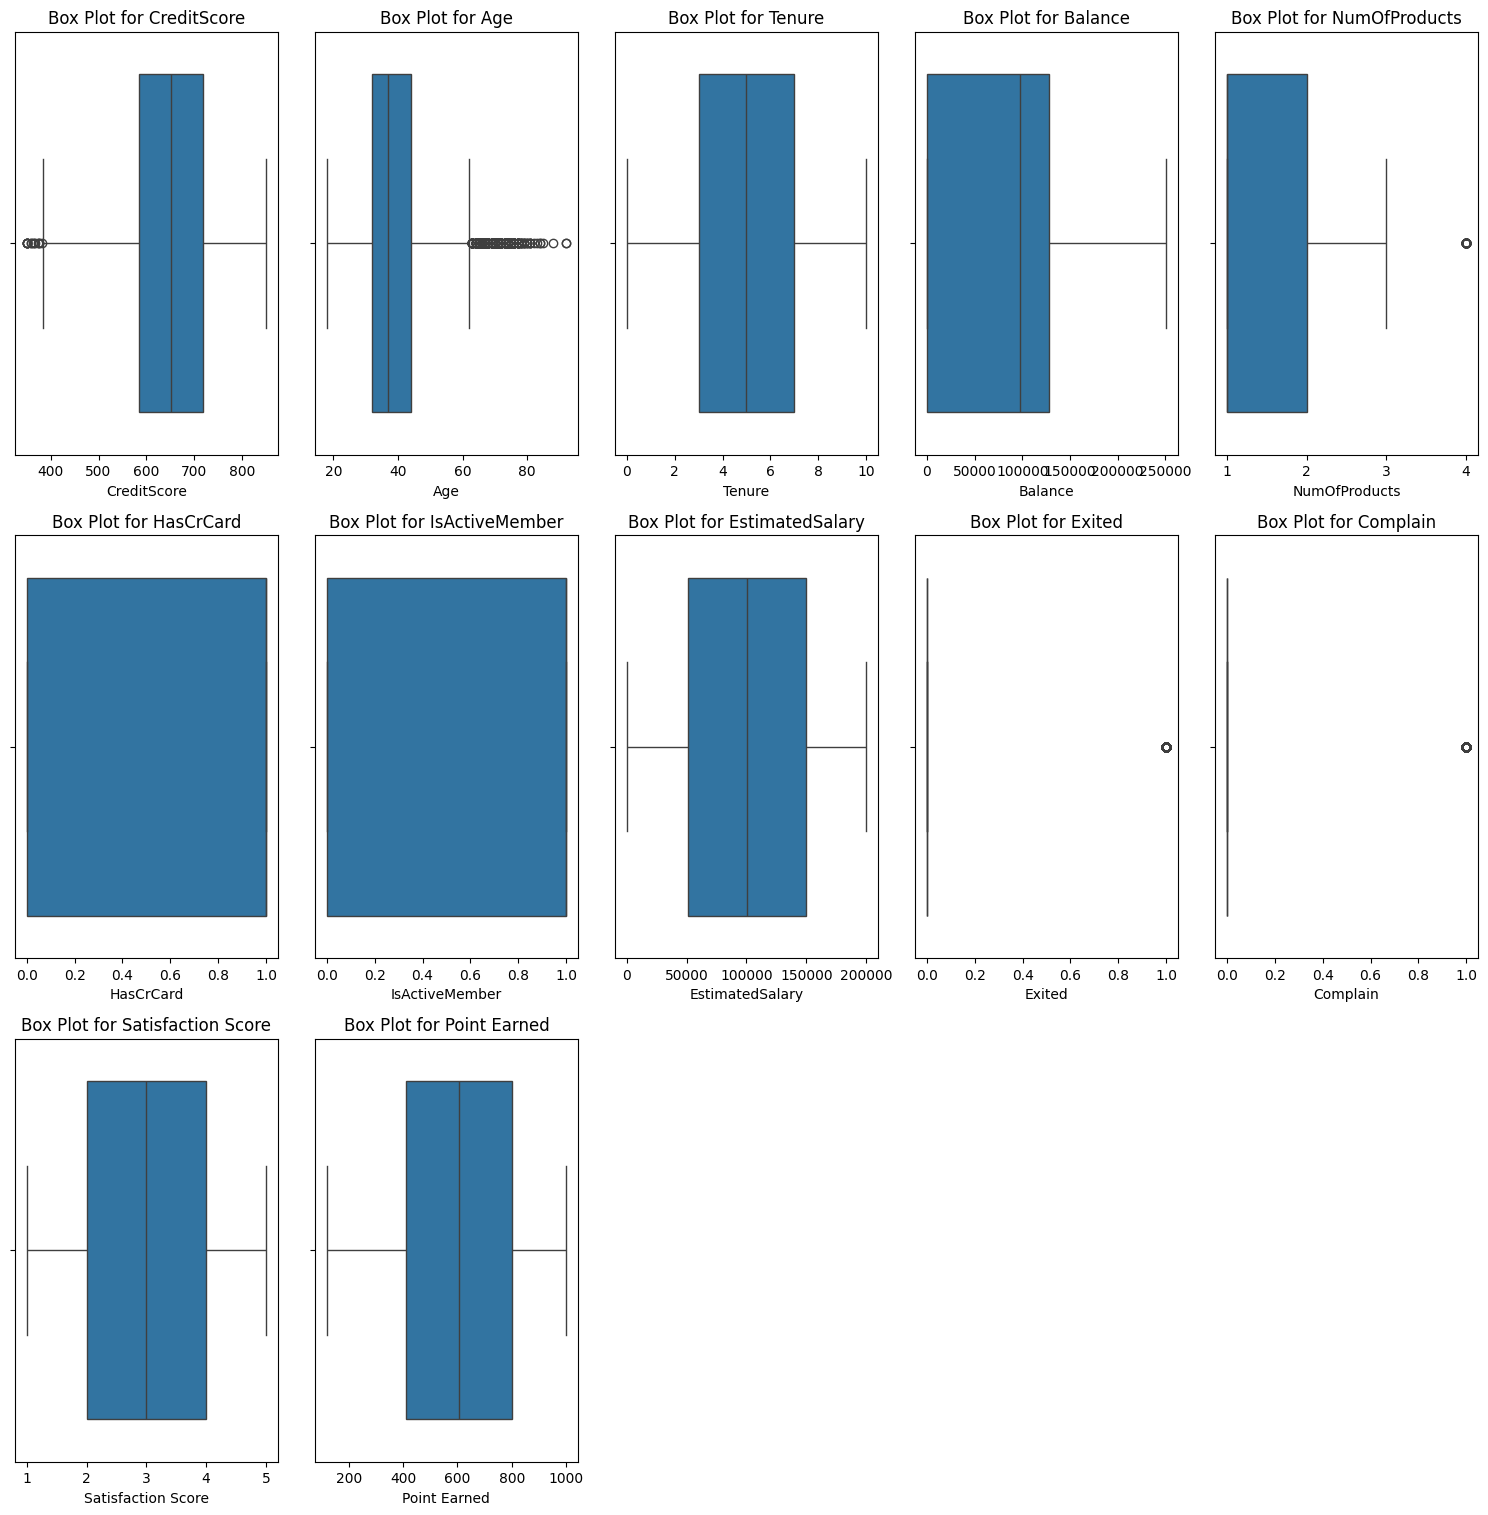

In [28]:
num_feat = df.select_dtypes(include=['number'])
feat = len(num_feat.columns)
num_rows = 8
num_cols = 5
fig, axis = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,40))
axis = axis.flatten()
# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(num_feat.columns):
    if i < feat:
        sns.boxplot(x=df[column], ax=axis[i])
        axis[i].set_title(f'Box Plot for {column}')

 # Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(num_feat.columns), len(axis)):
    fig.delaxes(axis[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

# Handling outliers

# checking relationship

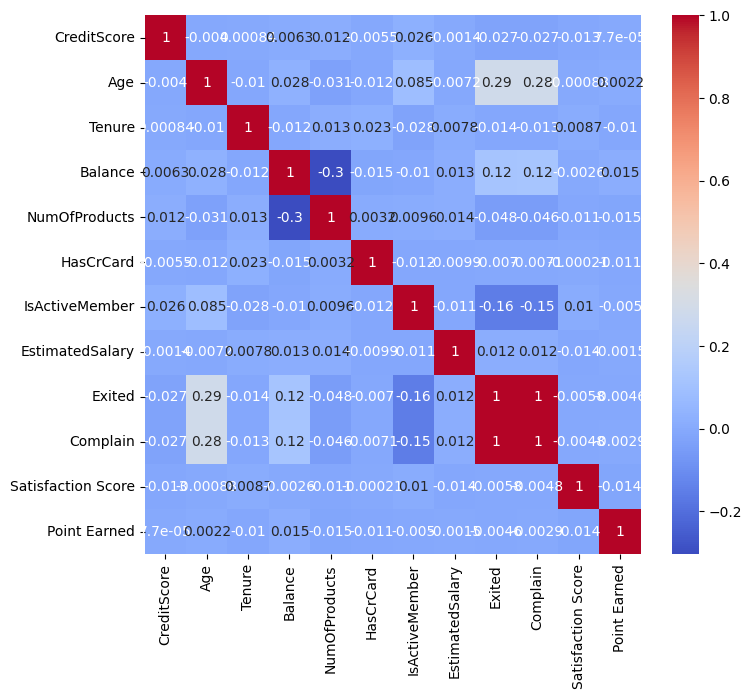

In [30]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 7))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

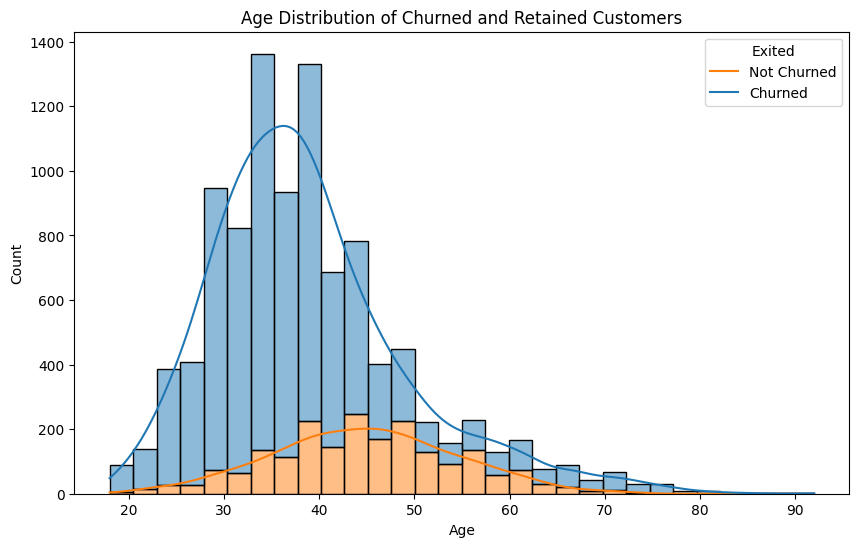

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Exited', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

In [32]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

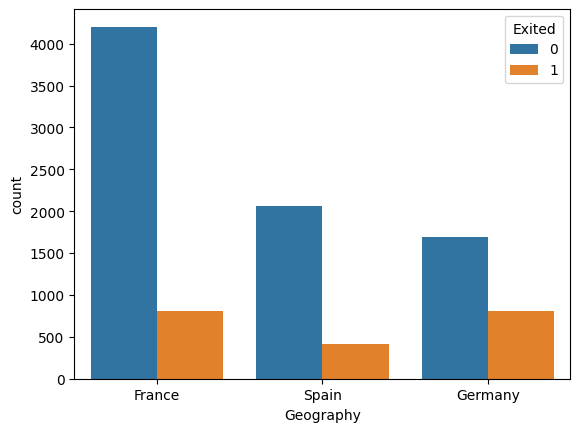

In [33]:

sns.countplot(data=df, x='Geography', hue='Exited')


plt.show()

In France

<Axes: xlabel='Tenure', ylabel='count'>

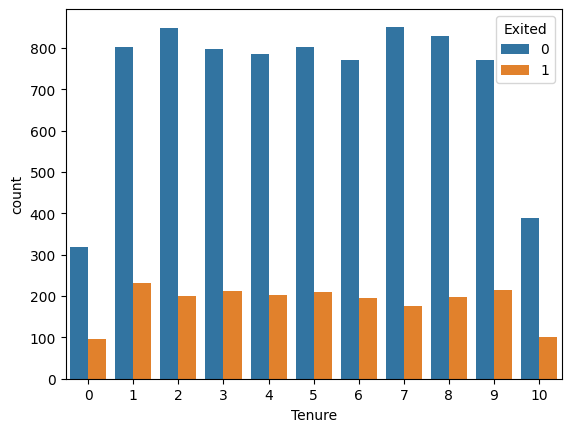

In [34]:
sns.countplot(data=df, x='Tenure', hue='Exited')


In [35]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

##*Numer* of products

In [ ]:
#for 1 percentage
one = df[df['NumOfProducts']==1]
one['Exited'].value_counts(normalize = True)

In [38]:
#for 2 percentage
two = df[df['NumOfProducts']==2]
two['Exited'].value_counts(normalize = True)

Exited
0    0.923965
1    0.076035
Name: proportion, dtype: float64

In [37]:
#for 3 percentage
thr = df[df['NumOfProducts']==3]
thr['Exited'].value_counts(normalize = True)

Exited
1    0.827068
0    0.172932
Name: proportion, dtype: float64

In [39]:
#for 4 percentage
fo = df[df['NumOfProducts']==4]
fo['Exited'].value_counts(normalize = True)

Exited
1    1.0
Name: proportion, dtype: float64

In [40]:
df['NumOfProducts'].value_counts(normalize=True)

NumOfProducts
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: proportion, dtype: float64

<Axes: xlabel='NumOfProducts', ylabel='count'>

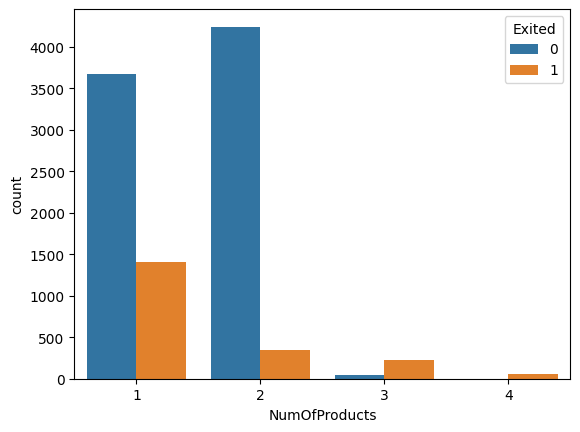

In [41]:
sns.countplot(data=df, x='NumOfProducts', hue='Exited')


<Axes: xlabel='HasCrCard', ylabel='count'>

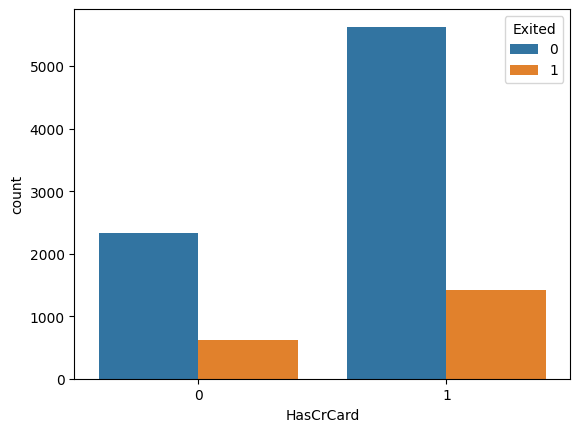

In [42]:
sns.countplot(data=df, x='HasCrCard', hue='Exited')

In [43]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [44]:
df =pd.get_dummies(df)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,False,True,True,False,False,True,False,False


#spliting data

##spliting data into training and testing


In [55]:
x = df.drop(columns = 'Exited', axis = 1)
y =df['Exited']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=42)

The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions. In this case, the model correctly predicted 1607 instances of the negative class (0) and incorrectly predicted 393 instances of the positive class (1). However, it did not make any correct positive predictions.

# Decision tree

In [65]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
y_tree_pred = tree.predict(X_test)
y_tree_pred



array([0, 0, 0, ..., 1, 1, 1])

In [67]:
new_input = np.array([[500,34, 5, 3434, 2,1,101348.88,1,1,5,454,0,1,0,1,1,1,1,1,1]])
tree.predict(new_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [70]:
# Compute accuracy score
accuracy = accuracy_score(y_test, y_tree_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_tree_pred)
print("Classification Report:")
print(report)
# Compute F1 score
f1 = f1_score(y_test, y_tree_pred)
print("F1 Score:", f1)

Accuracy: 0.998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

F1 Score: 0.9949109414758269


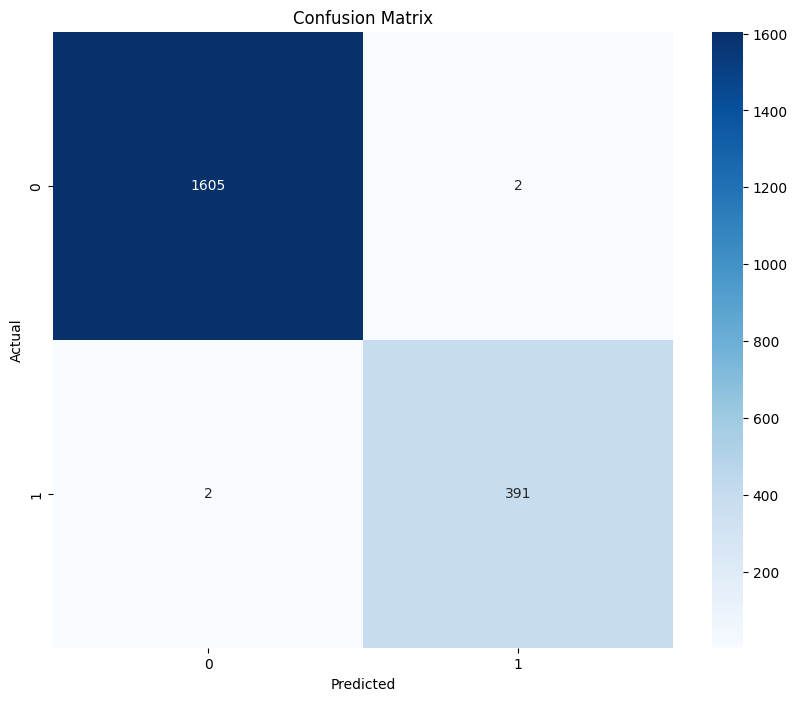

In [68]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_tree_pred)
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
# show()
plt.show()

Based on the provided evaluation scores, here is a short report:

Accuracy score:  0.998
The accuracy score represents the proportion of correct predictions over the total number of predictions. In this case, the model achieved an accuracy of  0.998, indicating that approximately 100.99% of the predictions were correct.

Recall score: 0.0
The recall score, also known as sensitivity or true positive rate, measures the proportion of true positive predictions over the total number of actual positive instances. A score of 0.1 suggests that the model did not correctly identify any positive instances.

Precision score: 0.0
The precision score measures the proportion of true positive predictions over the total number of positive predictions. A score of 0.99 indicates that the model did not make any true positive predictions.

F1 score: 0.0
The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance. A score of
F1 Score: 0.994 indicates that both precision and recall are zero.